# 机器学习纳米学位
## 监督学习
## 项目2: 为*CharityML*寻找捐献者

欢迎来到机器学习工程师纳米学位的第二个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

在这个项目中，你将使用1994年美国人口普查收集的数据，选用几个监督学习算法以准确地建模被调查者的收入。然后，你将根据初步结果从中选择出最佳的候选算法，并进一步优化该算法以最好地建模这些数据。你的目标是建立一个能够准确地预测被调查者年收入是否超过50000美元的模型。这种类型的任务会出现在那些依赖于捐款而存在的非营利性组织。了解人群的收入情况可以帮助一个非营利性的机构更好地了解他们要多大的捐赠，或是否他们应该接触这些人。虽然我们很难直接从公开的资源中推断出一个人的一般收入阶层，但是我们可以（也正是我们将要做的）从其他的一些公开的可获得的资源中获得一些特征从而推断出该值。

这个项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Census+Income)。这个数据集是由Ron Kohavi和Barry Becker在发表文章_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_之后捐赠的，你可以在Ron Kohavi提供的[在线版本](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf)中找到这个文章。我们在这里探索的数据集相比于原有的数据集有一些小小的改变，比如说移除了特征`'fnlwgt'` 以及一些遗失的或者是格式不正确的记录。

----
## 探索数据
运行下面的代码单元以载入需要的Python库并导入人口普查数据。注意数据集的最后一列`'income'`将是我们需要预测的列（表示被调查者的年收入会大于或者是最多50,000美元），人口普查数据中的每一列都将是关于被调查者的特征。

In [41]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("census.csv")

# 成功 - 显示第一条记录
display(data.head(n=4))

data.shape

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K


(45222, 14)

### 练习：数据探索
首先我们对数据集进行一个粗略的探索，我们将看看每一个类别里会有多少被调查者？并且告诉我们这些里面多大比例是年收入大于50,000美元的。在下面的代码单元中，你将需要计算以下量：

- 总的记录数量，`'n_records'`
- 年收入大于50,000美元的人数，`'n_greater_50k'`.
- 年收入最多为50,000美元的人数 `'n_at_most_50k'`.
- 年收入大于50,000美元的人所占的比例， `'greater_percent'`.

**提示：** 您可能需要查看上面的生成的表，以了解`'income'`条目的格式是什么样的。 

In [42]:
# TODO：总的记录数
n_records = data.shape[0]

# TODO：被调查者的收入大于$50,000的人数
n_greater_50k = data[data['income'] == '>50K'].shape[0]

# TODO：被调查者的收入最多为$50,000的人数
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

# TODO：被调查者收入大于$50,000所占的比例
greater_percent = float (n_greater_50k) / n_records

# 打印结果
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent * 100)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## 准备数据
在数据能够被作为输入提供给机器学习算法之前，它经常需要被清洗，格式化，和重新组织 - 这通常被叫做**预处理**。幸运的是，对于这个数据集，没有我们必须处理的无效或丢失的条目，然而，由于某一些特征存在的特性我们必须进行一定的调整。这个预处理都可以极大地帮助我们提升几乎所有的学习算法的结果和预测能力。

### 转换倾斜的连续特征

一个数据集有时可能包含至少一个靠近某个数字的特征，但有时也会有一些相对来说存在极大值或者极小值的不平凡分布的的特征。算法对这种分布的数据会十分敏感，并且如果这种数据没有能够很好地规一化处理会使得算法表现不佳。在人口普查数据集的两个特征符合这个描述：'`capital-gain'`和`'capital-loss'`。

运行下面的代码单元以创建一个关于这两个特征的条形图。请注意当前的值的范围和它们是如何分布的。

['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


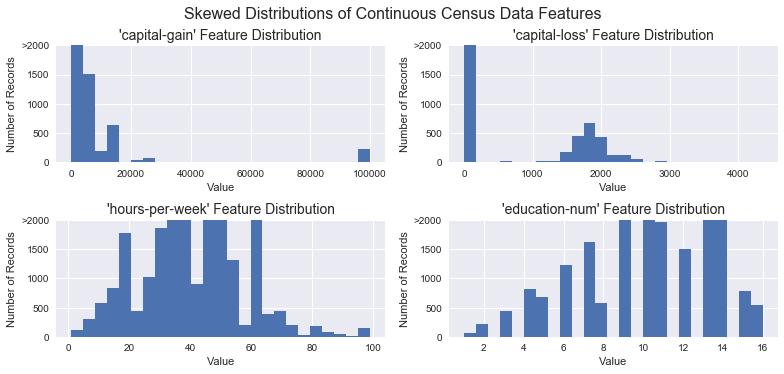

In [43]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)
print list(data.columns)
# 可视化原来数据的倾斜的连续特征
vs.distribution(data)

对于高度倾斜分布的特征如`'capital-gain'`和`'capital-loss'`，常见的做法是对数据施加一个<a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">对数转换</a>，将数据转换成对数，这样非常大和非常小的值不会对学习算法产生负面的影响。并且使用对数变换显著降低了由于异常值所造成的数据范围异常。但是在应用这个变换时必须小心：因为0的对数是没有定义的，所以我们必须先将数据处理成一个比0稍微大一点的数以成功完成对数转换。

运行下面的代码单元来执行数据的转换和可视化结果。再次，注意值的范围和它们是如何分布的。

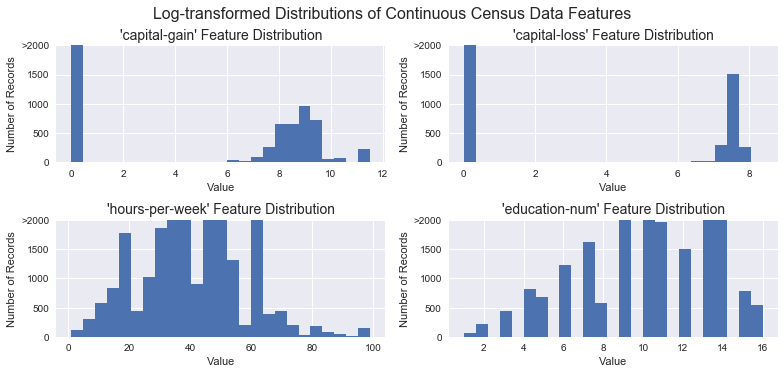

In [44]:
# 对于倾斜的数据使用Log转换
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# 可视化经过log之后的数据分布
vs.distribution(features_raw, transformed = True)

通过上面的两组图，可以看到Skewed数据在对数变换前后到底发生了什么：特征的取值范围从100000和4000分别下降到了12和8。

做对比参照的是两个相对不倾斜的特征（hours-per-week和education-num）的分布特性。可以发现，过于倾斜的数据会导致有值的那一小部分会挤在很小的一块，剩下的绝大多数都是空白。

### 规一化数字特征
除了对于高度倾斜的特征施加转换，对数值特征施加一些形式的缩放通常会是一个好的习惯。在数据上面施加一个缩放并不会改变数据分布的形式（比如上面说的'capital-gain' or 'capital-loss'）；但是，规一化保证了每一个特征在使用监督学习器的时候能够被平等的对待。注意一旦使用了缩放，观察数据的原始形式不再具有它本来的意义了，就像下面的例子展示的。

运行下面的代码单元来规一化每一个数字特征。我们将使用[`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)来完成这个任务。

In [45]:
# 导入sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
display(features_raw.head(n = 1))
print features_raw.columns

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


Index([u'age', u'workclass', u'education_level', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country'],
      dtype='object')


### 练习：数据预处理

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码**方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

|   | 一些特征 |                    | 特征_A | 特征_B | 特征_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

此外，对于非数字的特征，我们需要将非数字的标签`'income'`转换成数值以保证学习算法能够正常工作。因为这个标签只有两种可能的类别（"<=50K"和">50K"），我们不必要使用独热编码，可以直接将他们编码分别成两个类`0`和`1`，在下面的代码单元中你将实现以下功能：
 - 使用[`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)对`'features_raw'`数据来施加一个独热编码。
 - 将目标标签`'income_raw'`转换成数字项。
   - 将"<=50K"转换成`0`；将">50K"转换成`1`。

In [46]:
# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)

# TODO：将'income_raw'编码成数字值
# 特别注意：需要确保income中的元素是可以运算的数据类型
# 如果写成 income[income == '>50K'] = 1, income[income == '<=50K'] = 0
# 由于Series的dtype只会随着元素更新而自动往宽泛变化（例如int→object），并不会自动往小变（object→int）
# 因此即使赋值的数据类型的确是int，但是由于income的dtype一开始就是object，因此更新元素后，其dtype依然是object
# 这会导致无法运算。解决方案是显式调用 astype(int)，将Series的dtype转型为可运算的类型。
# 反之，如果使用判断语句，则生成的新Series的dtype将会自动确定为bool，这是可以直接运算的。
# income = income_raw.copy()       # 这里其实并不需要拷贝。因为(income == '>50K')这个语句只会生成一个全新的Series，而不会修改原DataFrame
income = (income_raw == '>50K')    # 这样得到的income是bool元素类型的Series
# income.astype(int)               # 这样得到的income是int类型（0，1）的Series


# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# 移除下面一行的注释以观察编码的特征名字
# print encoded

103 total features after one-hot encoding.


### 混洗和切分数据
现在所有的 _类别变量_ 已被转换成数值特征，而且所有的数值特征已被规一化。和我们一般情况下做的一样，我们现在将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。

运行下面的代码单元来完成切分。

In [47]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# 显示切分的结果
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## 评价模型性能
在这一部分中，我们将尝试四种不同的算法，并确定哪一个能够最好地建模数据。这里面的三个将是你选择的监督学习器，而第四种算法被称为一个*朴素的预测器*。


### 评价方法和朴素的预测器
*CharityML*通过他们的研究人员知道被调查者的年收入大于\$50,000最有可能向他们捐款。因为这个原因*CharityML*对于准确预测谁能够获得\$50,000以上收入尤其有兴趣。这样看起来使用**准确率**作为评价模型的标准是合适的。另外，把*没有*收入大于\$50,000的人识别成年收入大于\$50,000对于*CharityML*来说是有害的，因为他想要找到的是有意愿捐款的用户。这样，我们期望的模型具有准确预测那些能够年收入大于\$50,000的能力比模型去**查全**这些被调查者*更重要*。我们能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当$\beta = 0.5$的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。

通过查看不同类别的数据分布（那些最多赚\$50,000和那些能够赚更多的），我们能发现：很明显的是很多的被调查者年收入没有超过\$50,000。这点会显著地影响**准确率**，因为我们可以简单地预测说*“这个人的收入没有超过\$50,000”*，这样我们甚至不用看数据就能做到我们的预测在一般情况下是正确的！做这样一个预测被称作是**朴素的**，因为我们没有任何信息去证实这种说法。通常考虑对你的数据使用一个*朴素的预测器*是十分重要的，这样能够帮助我们建立一个模型的表现是否好的基准。那有人说，使用这样一个预测是没有意义的：如果我们预测所有人的收入都低于\$50,000，那么*CharityML*就不会有人捐款了。

### 问题 1 - 朴素预测器的性能
*如果我们选择一个无论什么情况都预测被调查者年收入大于\$50,000的模型，那么这个模型在这个数据集上的准确率和F-score是多少？*  
**注意：** 你必须使用下面的代码单元将你的计算结果赋值给`'accuracy'` 和 `'fscore'`，这些值会在后面被使用，请注意这里不能使用scikit-learn，你需要根据公式自己实现相关计算。

In [73]:
def naive_model(y, beta):
    total = y.shape[0]
    true_positive = y[y == True].shape[0]
    false_positive = total - true_positive
    false_negative = 0
    true_negative = 0

    # TODO： 计算准确率
    accuracy = float(true_positive) / total
    # TODO： 使用上面的公式，并设置beta=0.5计算F-score
    precision = float(true_positive) / (true_positive + false_positive)
    recall = float(true_positive) / (true_positive + false_negative)
    fscore = (1 + beta**2) * precision * recall / (precision * beta**2 + recall)
    # 打印结果
    print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)
    return accuracy, fscore

print "针对整个数据集"
naive_model(income, 0.5)

print "针对测试数据集"
accuracy, fscore = naive_model(y_test, 0.5)

针对整个数据集
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]
针对测试数据集
Naive Predictor: [Accuracy score: 0.2438, F-score: 0.2872]


### 监督学习模型
**下面的监督学习模型是现在在** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **中你能够选择的模型**

Model | Performance
:---  | :---
高斯朴素贝叶斯 (GaussianNB) | **Poor**
决策树                     | **OK**
集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting) | **Great**
K近邻 (KNeighbors)         | **OK (But slow in predicton)**
随机梯度下降分类器 (SGDC)    | **OK**
支持向量机 (SVM)            | **OK（But slow in training）**
Logistic Regression        | **Great**


### 问题 2 - 模型应用

列出从上面的监督学习模型中选择的三个适合我们这个问题的模型，你将在人口普查数据上测试这每个算法。对于你选择的每一个算法：

- *描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）*
- *这个模型的优势是什么？他什么情况下表现最好？*
- *这个模型的缺点是什么？什么条件下它表现很差？*
- *根据我们当前数据集的特点，为什么这个模型适合这个问题。*

**回答： **
我在下面的测试流水线上把这里列出的一共10种模型（集成方法算4种）都测了一遍（random_state=0），按测试数据的精确度和F-Score排名的结果如下：

    - 最好的前三名是AdaBoost、Gradient Boosting和Logistic Regression。
    - K近邻和支持向量机这两个模型的性能还可以，但是主要问题是它们耗时都远远高于其他模型。K近邻的在100%训练集下预测需要25秒，SVM在100%训练集下训练需要83秒。
    - 对于SGDC和DT：在训练集较大时，随机梯度下降和决策树的性能基本类似，但是在训练集较小（1%）时，决策树会明显好于随机梯度下降。
    - GaussianNB的精确度和F-Score全场最差。

鉴于AdaBoost和Gradient Boosting都属于集成学习这个大类，因此下面选择AdaBoost、Logistic Regression、Decision Tree这三个模型回答问题。

### 1. Decision Tree

- **真实应用场景**

    - 区分哈勃望远镜所获取图像信息中的真实行星和宇宙射线。Salzburg将决策树应用于识别图像中的行星和宇宙射线，给予模型两千多个训练数据，这些数据标注了20种特征，并且给出了是行星还是宇宙射线的标签，训练后的模型可以通过9个节点的复杂度就做到95%的泛化精确率。


- **优点**

    1. 可解释性好。决策树只要画出来，就能自动说明哪些特征起到重要作用，特征是如何划分的，可以分析出很多不言自明的信息。
    2. 自动隐含特征选择的理念。决策树的算法倾向于选择最重要的特征作为最上层的节点，这与特征选择的思路不谋而合。
    3. 对于非线性模型的拟合性能好。相比于回归算法使用多项式方程拟合，决策树的思路完全不同，因此线性与否并不会影响决策树的性能。


- **缺点**

    1. 稳定性差。数据分布的微小变化都可能导致树结构的较大变化。
    2. 不适合用来描述参数特别复杂的数据。
    3. 容易过拟合。随着树深度的增大，容易对训练数据抠得太死，以至于过拟合几乎是必然的结局。需要手动控制树的深度。
    4. 容易被攻击。虽然决策树整体上可以用很多特征，但是从决策的每一步来看，它本质上还是依靠于单个特征的，因此对于垃圾邮件分类的问题，垃圾邮件可以通过修改很少的特征就躲避开决策树分类器的识别。


- **适用场景**

    - 如果问题与特征之间存在着比较简单而清晰的树状关系（或者说理想的判决门限近似于矩形，与各个特征坐标平行）那么用决策树的效果最好。
    - 决策树也可以用于帮助人们对手头的数据有一个初步的了解，比如哪个特征相对比较重要，为后续的工作提供一些信息。


- **不适用的场景**

    对于有很多很多重要性均等的特征（或者特征之间的关系耦合的比较复杂）的问题，决策树将会很不稳定。


- **为什么适合于目前这个问题**
    
    因为需要可解释性比较强的模型。
    
    疑问：到底该如何分析“XXX算法适合XXX问题”呢？
    

- **Reference**: Page75, https://booksite.elsevier.com/9780124438804/leondes_expert_vol1_ch3.pdf


### 2. Logistic Regression

- **真实应用场景**
    
    - 广泛用于商业风险评估。例如J.-Y. KUNG的文章中使用LR对房贷进行风险评估。
    
    
- **优点**

    1. 不容易过拟合。因为LR本质上是线性分类器，其方差较小，模型也不复杂，不容易过拟合。
    2. 输出值具有概率含义。
    3. 运算量小，运行速度快。
    

- **缺点**
    1. 本身并不能处理非线性可分的问题（但是可以通过Kernel Trick在高维进行线性划分）
    2. 容易欠拟合（过于简化问题）
    
    
- **适用场景**
    
    - 存在单个线性门限的解的问题。
    - 需要运算速度快的场景


- **不适用的场景**
    
    非线性可分的问题。需要用核函数在高维进行线性划分。
    

- **为什么适合于目前这个问题**

    我是看测出来的评价指标打分挺高才选的...事实证明，实验本身就是判断模型是否适合当前问题的有力依据。


- **Reference**: 
    - https://www.zhihu.com/question/21449767
    - http://ir.csu.edu.tw/bitstream/987654321/3004/2/Application+of+Logistic+Regression+Analysis+of+Home+Mortgage+Loan+Prepayment+and+Default+Risk.pdf


### 3. AdaBoost

- **真实应用场景**

    B. Markoski等人将AdaBoost用于识别视频中的篮球队员。
    
    
- **优点**
    
    - 具有较低的泛化误差
    - 可以使用绝大多数的分类器作为基学习器（注意：对于比较强的模型则需要先弱化才能用），而不是只拘泥于一种模型。
    

- **缺点**

    - 对于异常值敏感
    - 运行速度慢
    
    
- **适用场景**

    - 具有数值特征的问题
    

- **不适用的场景**

    应该没有什么不适合的，如果说有，就是不适合特征特别多的问题，因为会导致运行速度很慢。因为AdaBoost其实底层用的是单节点决策树，因此即使对于一个样本，有多少个特征就要跑多少次决策树，更不要提还要迭代很多次。就现在这个问题，100个特征，500个学习器，就需要7秒钟。如果识别几十万个特征的一张图片，将会慢得多。但是这个问题可以通过特征选择来规避，所以严格来讲不算是问题。
    

- **为什么适合于目前这个问题**

    我是看测出来的评价指标打分挺高才选的...当前问题的特征数量不算太多，对于运行时间没有特别要求，而且追求最高性能，所以AdaBoost挺好的。
    

- **Reference**: 

    - https://www.uni-obuda.hu/journal/Markoski_Ivankovic_Ratgeber_Pecev_Glusac_57.pdf


### 练习 - 创建一个训练和预测的流水线
为了正确评估你选择的每一个模型的性能，创建一个能够帮助你快速有效地使用不同大小的训练集并在测试集上做预测的训练和测试的流水线是十分重要的。
你在这里实现的功能将会在接下来的部分中被用到。在下面的代码单元中，你将实现以下功能：

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用样例训练集拟合学习器，并记录训练时间。
 - 用学习器来对训练集进行预测并记录预测时间。
 - 在最前面的300个*训练数据*上做预测。
 - 计算训练数据和测试数据的准确率。
 - 计算训练数据和测试数据的F-score。

In [49]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    model_name = learner.__class__.__name__
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # 获得程序结束时间
    
    # TODO：计算训练时间
    results['train_time'] = end - start
    # print model_name, 'train_time:', results['train_time']
    
    # TODO: 得到在测试集上的预测值
    #       然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    pred_test = learner.predict(X_test)
    pred_train = learner.predict(X_train[:300])
    end = time() # 获得程序结束时间
    
    # TODO：计算预测用时
    results['pred_time'] = end - start
    # print model_name, 'pred_time:', results['pred_time']
            
    # TODO：计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[:300], pred_train)
    # print model_name, 'train accuracy:', results['acc_train']
    
    # TODO：计算在测试集上的准确率
    results['acc_test'] = accuracy_score(y_test, pred_test)
    print model_name, 'test accuracy:', results['acc_test']
    
    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train[:300], pred_train, 0.5)
    # print model_name, 'train F-Score:', results['f_train']
        
    # TODO：计算测试集上的F-score
    results['f_test'] = fbeta_score(y_test, pred_test, 0.5)
    print model_name, 'test F-Score:', results['f_test']
       
    # 成功
    print "{} trained on {} samples.".format(model_name, sample_size)
        
    # 返回结果
    return results

### 练习：初始模型的评估
在下面的代码单元中，您将需要实现以下功能：             
- 导入你在前面讨论的三个监督学习模型。             
- 初始化三个模型并存储在`'clf_A'`，`'clf_B'`和`'clf_C'`中。         
  - 如果可能对每一个模型都设置一个`random_state`。       
  - **注意：**这里先使用每一个模型的默认参数，在接下来的部分中你将需要对某一个模型的参数进行调整。             
- 计算记录的数目等于1%，10%，和100%的训练数据，并将这些值存储在`'samples'`中             

**注意：**取决于你选择的算法，下面实现的代码可能需要一些时间来运行！

DecisionTreeClassifier test accuracy: 0.772139303483
DecisionTreeClassifier test F-Score: 0.536351763169
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier test accuracy: 0.801658374793
DecisionTreeClassifier test F-Score: 0.593874833555
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier test accuracy: 0.818684355998
DecisionTreeClassifier test F-Score: 0.628170832949
DecisionTreeClassifier trained on 36177 samples.
AdaBoostClassifier test accuracy: 0.820784964069
AdaBoostClassifier test F-Score: 0.633010468643
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier test accuracy: 0.849861802101
AdaBoostClassifier test F-Score: 0.70188208381
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier test accuracy: 0.857600884467
AdaBoostClassifier test F-Score: 0.724550898204
AdaBoostClassifier trained on 36177 samples.
LogisticRegression test accuracy: 0.810834715312
LogisticRegression test F-Score: 0.608163745442
LogisticRegression tra

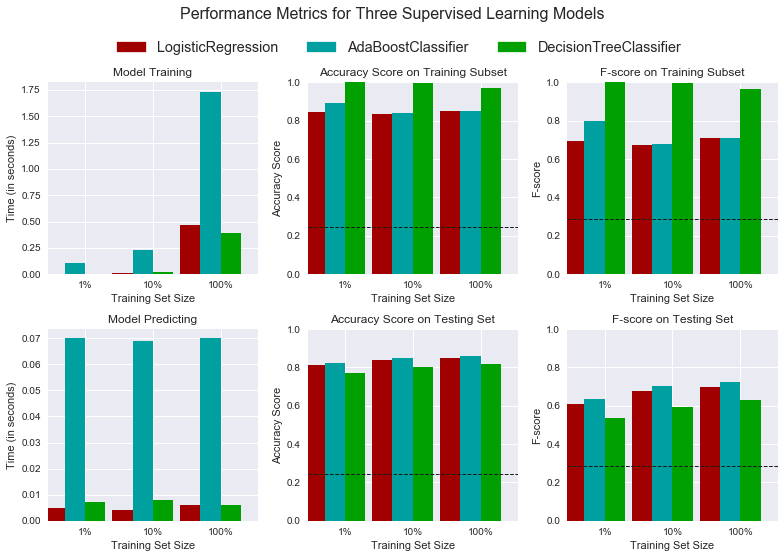

In [74]:
# TODO：从sklearn中导入三个监督学习模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

# TODO：初始化三个模型（在这里尝试了上面列举的10种模型）
clfs = []
clfs.append(DecisionTreeClassifier(random_state=0))
clfs.append(AdaBoostClassifier(random_state=0))
clfs.append(LogisticRegression(random_state=0))
clfs.append(GaussianNB())
# clfs.append(KNeighborsClassifier())    # slow: prediction takes 25s
clfs.append(SGDClassifier(random_state=0))
# clfs.append(SVC())                     # too slow: training takes 83s
clfs.append(RandomForestClassifier(random_state=0))
clfs.append(GradientBoostingClassifier(random_state=0))
clfs.append(BaggingClassifier(random_state=0))


# TODO：计算1%， 10%， 100%的训练数据分别对应多少点. 注意传入的必须是整数，因此需要强制转型。
samples_1 = int(y_train.shape[0] * 0.01)      # 361
samples_10 = int(y_train.shape[0] * 0.1)      # 3617
samples_100 = y_train.shape[0] * 1            # 36177

# 输出学习器的结果：遍历10个模型
results = {}
for clf in clfs:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# 选择三个模型存入dict供可视化
result_for_display = {}
result_for_display['DecisionTreeClassifier'] = results['DecisionTreeClassifier']
result_for_display['LogisticRegression'] = results['LogisticRegression']
result_for_display['AdaBoostClassifier'] = results['AdaBoostClassifier']
        
# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(result_for_display, accuracy, fscore)

----
## 提高效果

在这最后一节中，您将从三个有监督的学习模型中选择*最好的*模型来使用学生数据。你将在整个训练集（`X_train`和`y_train`）上通过使用网格搜索优化至少调节一个参数以获得一个比没有调节之前更好的F-score。

### 问题 3 - 选择最佳的模型

*基于你前面做的评价，用一到两段向*CharityML*解释这三个模型中哪一个对于判断被调查者的年收入大于\$50,000是最合适的。*             
**提示：**你的答案应该包括关于评价指标，预测/训练时间，以及该算法是否适合这里的数据的讨论。

**回答：** 三者中最适合的是AdaBoost模型。原因如下：


- **评价指标**

    由于为了评估模型泛化的能力，主要以测试集的Accuracy和F-Score作为评价指标，可以看到，Logistic Regresson / AdaBoost / Decision Tree 这三个模型中，AdaBoost模型的Accuracy和F-Score在所有训练样本数量的情况下都是最高的，最高达到85.7%的准确度和72.4%的F-Score，超过相同环境下的Logistic Regression的准确度 1%、F-Score 3%，更超过相同环境下的决策树模型的精确度4%、F-Score 10%。


- **时间**

    虽然AdaBoost的评价指标最好，但是相对的训练耗时也最长，在100%训练集的时候达到1.4秒，而其他两种算法无论在那种训练集下的训练时间都不超过0.4秒。虽然AdaBoost的耗时较多，但是还在容忍范围内。


- **是否适合数据**

    AdaBoost本质上是决策树的升级版，因此性能更胜一筹，其泛化误差可以根据最大学习器数量的增加而进一步提升。相比之下，决策树随着树深度的增加将会不可避免的出现过拟合。另外，对于这套数据而言，AdaBoost和Logistic Regression同样使用网格搜索调参（分别对n_estimator，C进行调参），AdaBoost的F-Score可以突破75%，而LR最多只能达到70%，AdaBoost始终超过Logistic Regression。因此，在对于时间不是特别敏感的前提下，AdaBoost是三者中最适合的模型。

### 问题 4 - 用通俗的话解释模型

*用一到两段话，向*CharityML*用外行也听得懂的话来解释最终模型是如何工作的。你需要解释所选模型的主要特点。例如，这个模型是怎样被训练的，它又是如何做出预测的。避免使用高级的数学或技术术语，不要使用公式或特定的算法名词。*

**回答： ** 

AdaBoost其实是基于其他分类算法之上的一种机制，它能够通过反复训练，让原本性能不是特别好的算法达到更高的性能。其思路可以类比于让学生准备考试，一个学生的单次学习能力有限，如果让这个学生反复去做那些他掌握的不好的题，不断查漏补缺，并且把从错题中学到的东西综合在一起，到最后他的水平一定会比一开始强。


- **AdaBoost的训练过程**

    具体来讲，AdaBoost会对训练数据进行多次训练。第一次训练时，所有的训练样本都具有同样的重要性。在第二次训练开始之前，我们会检查第一次训练的结果。首先要确保准确率比瞎猜强，如果还没有瞎猜强就说明当前用的模型根本不能再提升，需要换模型，如果比瞎猜强，我们会给样本中那些分类错误的样本（例如>50K的预测成<=50K）分配更重要的分值，然后用这个修改过的训练集对同样的模型进行第二次训练，如此循环往复，直到训练出N个模型。


- **AdaBoost的预测过程**

    AdaBoost会将输入的特征放入之前训练出来的N个模型中，得到N个预测值，然后最后根据每个模型的表现好坏，综合得出一个最终的预测值。
    
   

### 练习：模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需给出并尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)和[`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 如果能够设置的话，设置`random_state`。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器（learner）有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

- **分析AdaBoost模型随n_estimators变化的趋势**

在用GridSearch调参之前，我们首先需要确定要调的参数空间，以及模型性能和该参数之间的变化关系。

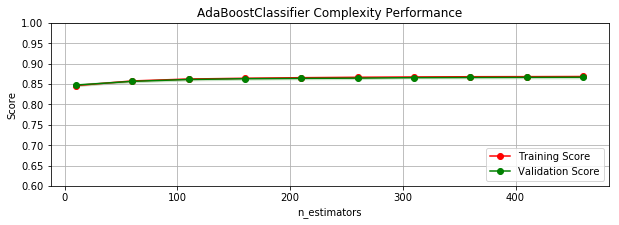

In [126]:
import matplotlib.pyplot as pl
from sklearn.model_selection import learning_curve, validation_curve
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

# Vary the max_depth parameter from 1 to 10
n_estimators = np.arange(10, 500, 50)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(AdaBoostClassifier(), X_train, y_train, \
    param_name = "n_estimators", param_range = n_estimators, cv = cv, scoring = 'accuracy')

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
pl.figure(figsize=(10, 3))
pl.title('AdaBoostClassifier Complexity Performance')
pl.plot(n_estimators, train_mean, 'o-', color = 'r', label = 'Training Score')
pl.plot(n_estimators, test_mean, 'o-', color = 'g', label = 'Validation Score')
pl.fill_between(n_estimators, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
pl.fill_between(n_estimators, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
pl.ylim([0.6, 1.0])

# Visual aesthetics
pl.legend(loc = 'lower right')
pl.xlabel('n_estimators')
pl.ylabel('Score')
pl.grid(True)
pl.show()

从上图可以看到，AdaBoost的性能会随着n_estimators的增长而缓慢上升。

In [115]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

# TODO：初始化分类器
clf = AdaBoostClassifier(random_state=0)

# TODO：创建你希望调节的参数列表
parameters = {'n_estimators' : np.arange(100, 600, 100)}
# cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(fbeta_score, beta=0.5)
start = time()
# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)
end = time()
opt_time = end - start
# 得到estimator
best_clf = grid_obj.best_estimator_
print best_clf.get_params()

# 使用没有调优的模型做预测
start = time()
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
end = time()
uno_time = end - start

# 汇报调参前和调参后的分数
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "Overall time spend:", uno_time
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "Overall time spend:", opt_time

{'n_estimators': 500, 'base_estimator': None, 'random_state': 0, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
Unoptimized model
------
Accuracy score on testing data: 0.8543
F-score on testing data: 0.7178
Overall time spend: 1.15000009537

Optimized Model
------
Final accuracy score on the testing data: 0.8657
Final F-score on the testing data: 0.7415
Overall time spend: 65.3120000362


### 问题 5 - 最终模型评估

_你的最优模型在测试数据上的准确率和F-score是多少？这些分数比没有优化的模型好还是差？你优化的结果相比于你在**问题 1**中得到的朴素预测器怎么样？_  
**注意：**请在下面的表格中填写你的结果，然后在答案框中提供讨论。

#### 结果:

|     评价指标     | 基准预测器 | 未优化的模型 | 优化的模型 |
| :------------: | :--------: | :---------: | :-------------: | 
| 准确率          | 0.2438     |  0.8543     |  0.8657       |
| F-score        | 0.2872     |  0.7178     |  0.7415       |


**回答：** 可以看到：

- 朴素预测器（基准预测器）的性能最差。
- 未优化的AdaBoost模型就已经远远好过朴素预测期，达到了85%的准确率和71%的F-Score。
- 进一步优化的AdaBoost模型由于增加了弱学习器的个数（500个），因此整体性能相比未优化的模型又有的一定程度的进步，准确度提升了1%，F-Score提升了3%。不过相应的，也付出了60倍的运行时间代价。

----
## 特征的重要性

在数据上（比如我们这里使用的人口普查的数据）使用监督学习算法的一个重要的任务是决定哪些特征能够提供最强的预测能力。通过专注于一些少量的有效特征和标签之间的关系，我们能够更加简单地理解这些现象，这在很多情况下都是十分有用的。在这个项目的情境下这表示我们希望选择一小部分特征，这些特征能够在预测被调查者是否年收入大于\$50,000这个问题上有很强的预测能力。

选择一个有`feature_importance_`属性（这是一个根据这个选择的分类器来对特征的重要性进行排序的函数）的scikit学习分类器（例如，AdaBoost，随机森林）。在下一个Python代码单元中用这个分类器拟合训练集数据并使用这个属性来决定这个人口普查数据中最重要的5个特征。

### 问题 6 - 观察特征相关性

当**探索数据**的时候，它显示在这个人口普查数据集中每一条记录我们有十三个可用的特征。             
_在这十三个记录中，你认为哪五个特征对于预测是最重要的，你会怎样对他们排序？理由是什么？_

**回答：** 首先通过领域知识进行推断，然后通过直方图呈现单个特征与收入的分布关系。

### 按Domain Knowledge分析

1. **年龄**显然是与收入密切相关的。在10-20岁的教育阶段，很少有人能够有超过50K的收入，随着年龄增长，人们步入社会开始工作，工作阅历和经验的增长，收入不断增加是正常的趋势，然后在60岁左右退休之后，收入肯定会逐渐减少。因此年龄应该是决定收入的强相关特征。

2. **教育水平**与收入也有很强的相关性。一个人接受的教育年限越长，通常能说明他的学历越高、智力水平高于平均值，因此收入有更大几率超过50K。

3. **职业类型**应该会与收入有一定关系。从事IT行业的应该会比清洁工的收入高。但是问题在于同一个行业不同职位的人有可能收入差别也很大，例如清洁工企业的CEO和小兵的收入肯定是不同的，因此分析起来有些难度。

4. **婚姻情况**也是一个决定收入的重要因素。婚姻使得男女可以互相照应，互相帮助，共享一些社会资源，因此会比单身群体更容易得到高收入。

5. **性别**也可以决定收入。男女平等是一个美好的愿景，但现实生活中男性比女性薪水高的情况屡见不鲜。

### 按特征的直方图分析

#### 1. 数值型特征的直方图

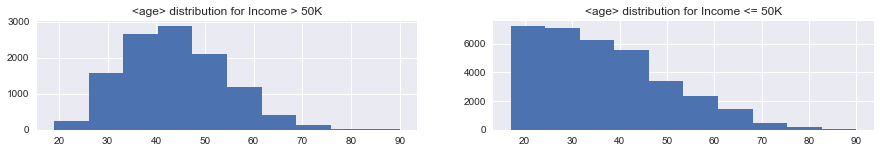

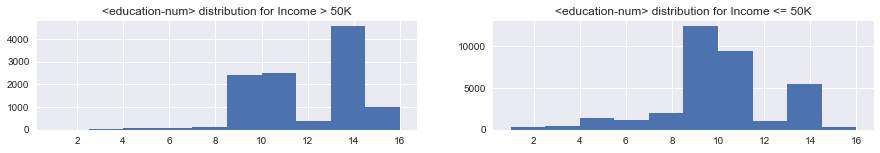

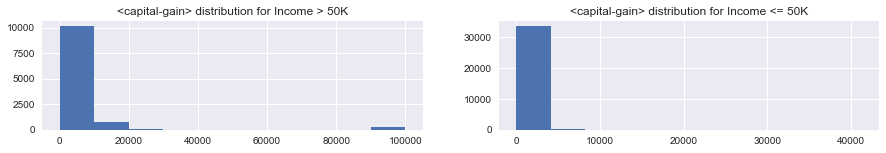

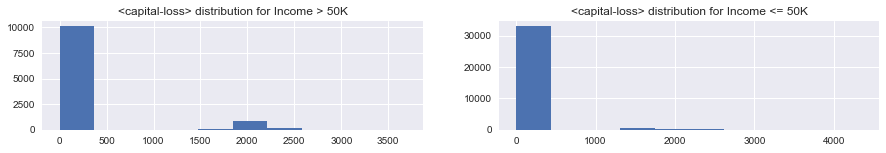

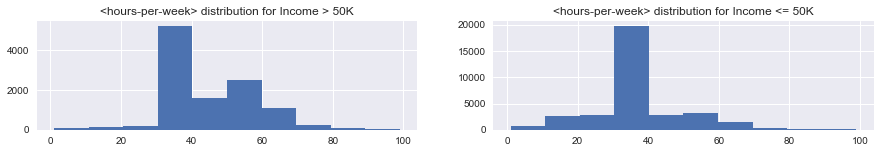

In [27]:
import matplotlib.pyplot as plt
num_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for f in num_features:
    dist = data[f][data['income'] == '>50K']
    dist2 = data[f][data['income'] == '<=50K']
    fig = plt.figure(figsize=(15,2))
    plt.subplot(121)
    plt.title(('<' + f + '> distribution for Income > 50K'))
    plt.hist(dist)
    plt.grid(True)
    plt.subplot(122)
    plt.title(('<' + f + '> distribution for Income <= 50K'))
    plt.hist(dist2)
    plt.grid(True)
    plt.show()

#### 2. 标签型特征的直方图

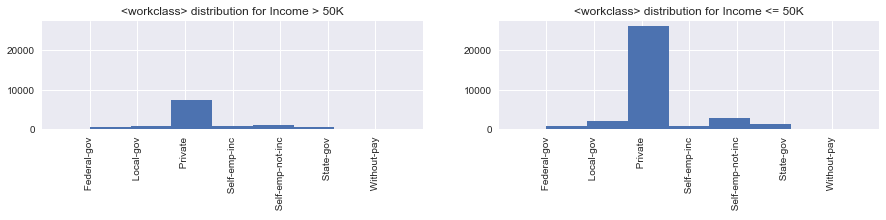

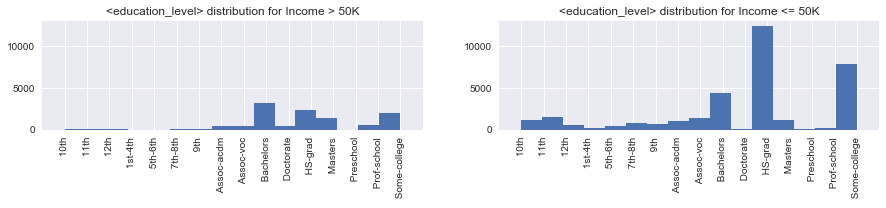

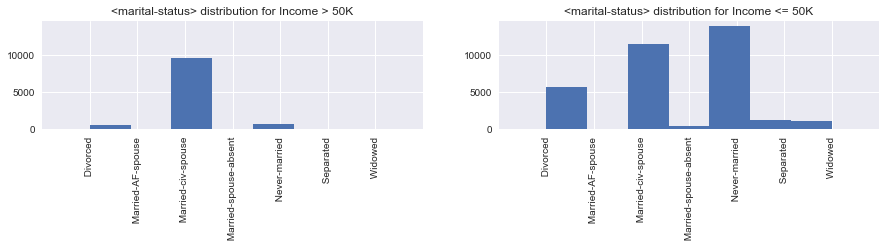

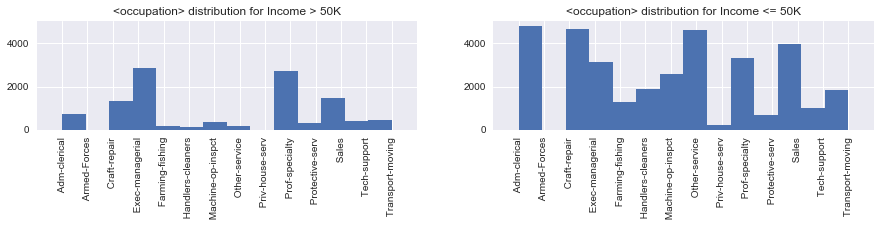

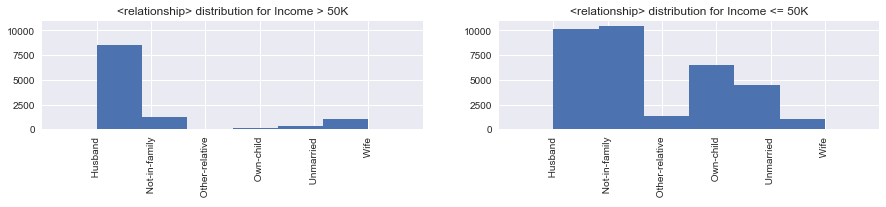

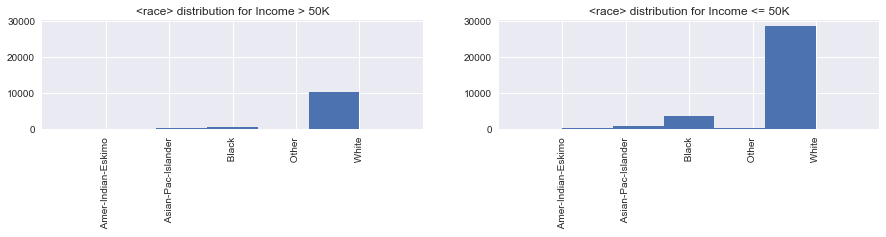

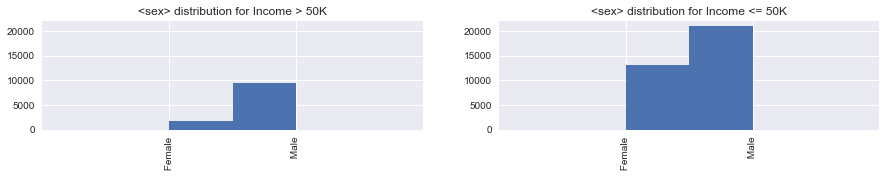

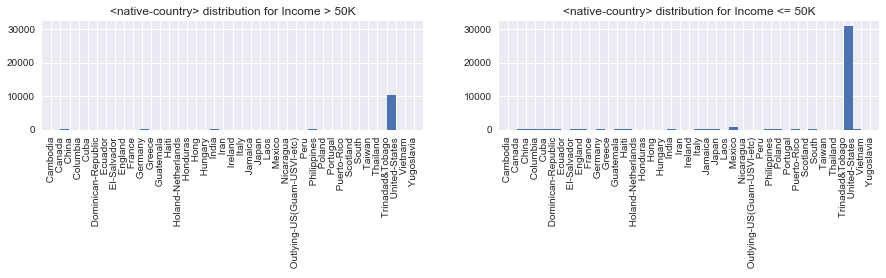

In [28]:
from sklearn.preprocessing import LabelEncoder
cat_features = ['workclass', 'education_level', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'native-country']

for f in cat_features:
    dist = data[f][data['income'] == '>50K']
    dist2 = data[f][data['income'] == '<=50K']
    labels = data[f].values
    le = LabelEncoder()
    le.fit(labels)
    xlabel = list(le.classes_)
    bin_num = len(xlabel)
    out = le.transform(dist)
    out2 = le.transform(dist2)
    plt.figure(figsize=(15,2))
    
    sp1 = plt.subplot(121)
    sp1.set_xlim([-1, bin_num])
    plt.title('<' + f + '> distribution for Income > 50K')
    plt.hist(out, bins=bin_num)
    ylim1 = plt.ylim()
    plt.xticks(range(bin_num), xlabel, size='small', rotation='vertical')
    plt.grid(True)
    
    sp2 = plt.subplot(122)
    sp2.set_xlim([-1, bin_num])
    plt.title('<' + f + '> distribution for Income <= 50K')
    plt.hist(out2, bins=bin_num)
    ylim2 = plt.ylim()
    xlabel = list(le.classes_)
    plt.xticks(range(bin_num), xlabel, size='small', rotation='vertical')
    plt.grid(True)
    
    ylim = max(ylim1, ylim2)
    sp1.set_ylim(ylim)
    sp2.set_ylim(ylim)
    plt.show()

### 使用Seaborn可视化指定特征的具体分布

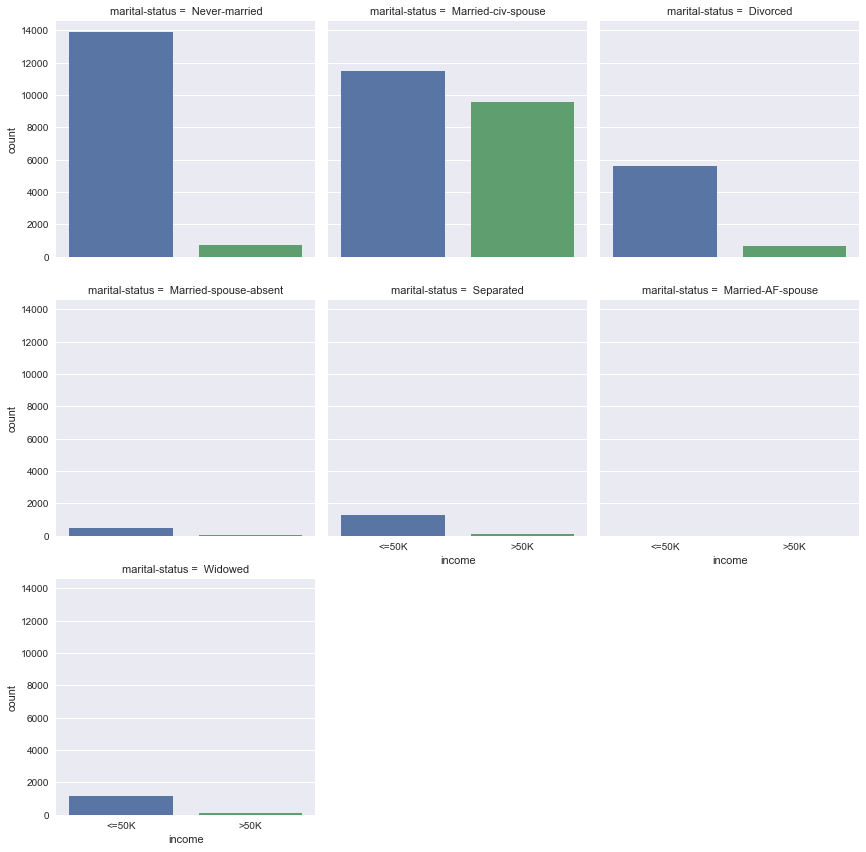

In [29]:
import seaborn as sns
sns.set(style = 'darkgrid', color_codes = True)
sns.factorplot("income", col = "marital-status", data = data, kind = "count", col_wrap = 3)

### 练习 - 提取特征重要性

选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

在下面的代码单元中，你将要实现以下功能：
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的`'.feature_importances_'`提取特征的重要性。

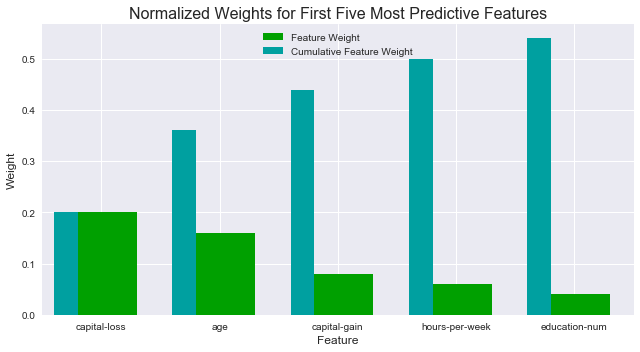

In [56]:
# TODO：导入一个有'feature_importances_'的监督学习模型

# TODO：在训练集上训练一个监督学习模型
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# TODO： 提取特征重要性
importances = model.feature_importances_

# 绘图
vs.feature_plot(importances, X_train, y_train)

### 查看指定特征的重要性占比

可以看到那些被拆散的特征（例如Occupation），虽然没有单独上榜，但是如果将它们合并在一起，其整体的重要性其实是很大的（0.18）
（注意：这些特征在使用OneHotEncoder打散之后，已经是新的特征了，因此这里的求和只是象征性的近似）

In [71]:
def get_importance(importances, name):
    feature_name = np.where(X_train.columns.str.contains(name))
    print name, "importance:", np.sum(importances[feature_name])

get_importance(importances, 'capital-loss')
get_importance(importances, 'capital-gain')
get_importance(importances, 'hours-per-week')
get_importance(importances, 'education-num')
get_importance(importances, 'occupation')
get_importance(importances, 'age')

capital-loss importance: 0.2
capital-gain importance: 0.08
hours-per-week importance: 0.06
education-num importance: 0.04
occupation importance: 0.18
age importance: 0.18


### 问题 7 - 提取特征重要性
观察上面创建的展示五个用于预测被调查者年收入是否大于\$50,000最相关的特征的可视化图像。
_这五个特征和你在**问题 6**中讨论的特征比较怎么样？如果说你的答案和这里的相近，那么这个可视化怎样佐证了你的想法？如果你的选择不相近，那么为什么你觉得这些特征更加相关？_

**回答：** 
- AdaBoost模型返回的5个最重要特征是：capital-loss, age, capital-gain, hours-per-week, education-num.
- GradientBoosting模型返回的5个最重要特征则是：capital-gain, capital-loss, marital-status_Married-civ-spouse, age, education-num.

可以看到两个算法的交集是capital-loss，capital-gain，age, education-num。基本可以看到模型都一致认为年龄、教育年限、投资收益和损失。其中年龄和教育年限与我的预估想法一致。但是我很意外看到投资收益和损失这两项特征竟然会占到几乎30%重要性的程度。

- 首先我查了一下投资收益和损失的定义，指的是区别与工资的一种收入。基本上一个人拥有的所有有形财产（车、房）和无形财产（股票、基金），都属于这个人的资产（Capital Asset），当你的资产卖出的时候比买入的时候还多，那么多出来的钱就算Capital Gain，如果少的话少的钱就是Capital Loss。

- 针对投资收益和损失的这两个特征的分布，我画了4个直方图（见下个Cell），分别显示了到底收入大于50K和小于50K的人群中的投资收益和损失情况。可以得出如下结论：
    - 绝大多数的富人和穷人的投资收益和损失都是0，非零值的人总数两个特征全加起来才5000人.
    - 取得投资收益的人中，富人比穷人多

#### 如何理解AdaBoost计算capital-loss和capital-gain这两个特征的重要性总体能够占比20%？

我所能看到的是，投资收益 / 损失大于0的人本身就少（2%），在这么少的两三千人中，穷人和富人都有，那么究竟是怎么区分的呢？而且竟然能达到20%这么大的重要性？有没有什么数据可视化的方式（在更高维度上？）能够让我们直观的感受到这种划分的存在呢？

经过一些实验，我发现不同的算法（具有`feature_importance_`属性的模型），尽管评估指标基本相近，但是对于特征重要性的排序却有很大变化。因此，**实际上这些排序的意义仅限于对应的模型**。

另一方面，可以通过将决策树可视化来进行分析，看看到底训练出来的模型是什么样的。越靠上的就是越重要的特征。

Accuracy = 0.847097844113
F0.5 = 0.706856935542
capital-loss importance: 0.0477773896135
capital-gain importance: 0.214703801592
hours-per-week importance: 0.0194255052107
education-num importance: 0.234190886277
occupation importance: 0.000310362807244
age importance: 0.0118588456374
marital-status importance: 0.471378295052


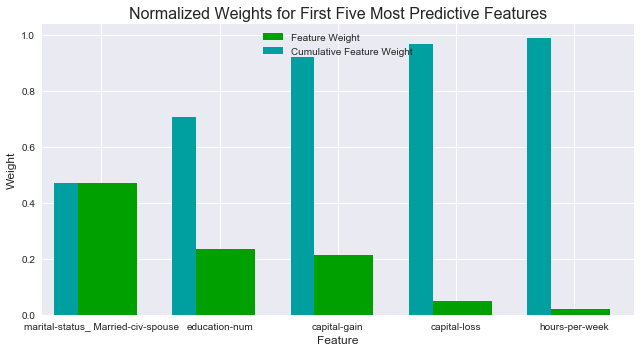

In [72]:
# 使用深度为5的决策树进行预测和训练，显示评估指标，显示主要特征的合计重要性，显示按单个特征排序的前五名，导出决策树模型图
from sklearn.tree import export_graphviz
tree_display = DecisionTreeClassifier(random_state=0, max_depth=5)
tree_display.fit(X_train, y_train)
tree_pred = tree_display.predict(X_test)
print 'Accuracy =', accuracy_score(y_test, tree_pred)
print 'F0.5 =', fbeta_score(y_test, tree_pred, 0.5)
tree_importance = tree_display.feature_importances_
get_importance(tree_importance, 'capital-loss')
get_importance(tree_importance, 'capital-gain')
get_importance(tree_importance, 'hours-per-week')
get_importance(tree_importance, 'education-num')
get_importance(tree_importance, 'occupation')
get_importance(tree_importance, 'age')
get_importance(tree_importance, 'marital-status')
vs.feature_plot(tree_importance, X_train, y_train)
export_graphviz(tree_display, out_file='tree.dot')

<img src="https://github.com/mtyylx/MLND/blob/master/P2_Finding_Donors/tree.png?raw=true">

#### 使用OneHotEncoder的模型训练所得到的特征重要性排序，是否会对哪些被拆散的特征不公平？如果使用LabelEncoder是否可以让特征呈现的更清晰？

例如occupancy这个特征，按理说工作类型应该是直接和收入相关的，但是却并没有出现在排名中。我认为原因之一是occupancy有十几类，即使整体重要性是10%，被OneHot编码打散后的单个特征的重要性也达不到1%，所以入不了榜。于是我改用LabelEncoder对特征进行处理（代码和结果见下面Cell），同样使用AdaBoost模型进行相同的训练，整体的性能基本一致，F-Score下降了0.7%。但是由于LabelEncoder没有将特征拆分，因此最后训练得到的Feature Importance就有了occupancy和relationship这种之前落选的特征。

我理解，这种所谓的不公平只是我主观角度上的想法。特征的排名仅仅是当前特征状态和所选算法的综合产物，换了算法、换了特征的处理方式，最后得到的特征排名将会有很大的变化。毕竟特征选择是为了使用削减特征的训练数据进行更快速的训练这个主旨服务的。因此客观的来看，这种"不公平"并不存在。

富人资产损失大于零的人数： 1098
穷人资产损失大于零的人数： 1042
富人资产收益大于零的人数： 2375
穷人资产收益大于零的人数： 1415


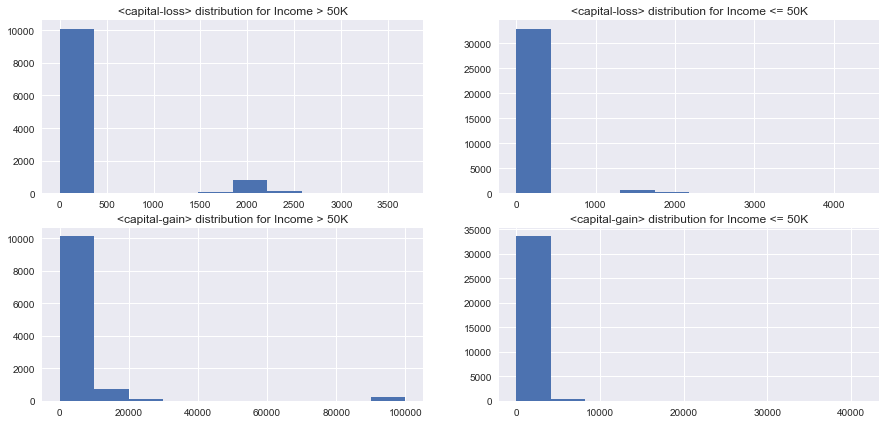

In [30]:
dist = data['capital-loss'][data['income'] == '>50K']
print '富人资产损失大于零的人数：', dist[dist > 0].count()
dist2 = data['capital-loss'][data['income'] == '<=50K']
print '穷人资产损失大于零的人数：', dist2[dist2 > 0].count()
dist3 = data['capital-gain'][data['income'] == '>50K']
print '富人资产收益大于零的人数：', dist3[dist3 > 0].count()
dist4 = data['capital-gain'][data['income'] == '<=50K']
print '穷人资产收益大于零的人数：', dist4[dist4 > 0].count()
fig = plt.figure(figsize=(15,7))
plt.subplot(221)
plt.title(('<capital-loss> distribution for Income > 50K'))
plt.hist(dist)
plt.subplot(222)
plt.title(('<capital-loss> distribution for Income <= 50K'))
plt.hist(dist2)
plt.subplot(223)
plt.title(('<capital-gain> distribution for Income > 50K'))
plt.hist(dist3)
plt.subplot(224)
plt.title(('<capital-gain> distribution for Income <= 50K'))
plt.hist(dist4)
plt.show()

 Accuracy = 0.854284134881
F0.5 = 0.717840946798


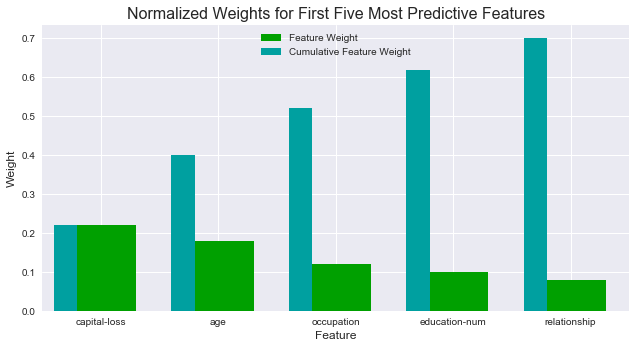

In [33]:
# Do label encoding for all catgorical features.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, accuracy_score
income = data['income']
income = (income == '>50K')

cat_features = ['workclass', 'education_level', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'native-country']
num_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

trans_feature = {}
for f in cat_features:
    labels = data[f].values
    le = LabelEncoder()
    le.fit(labels)
    trans = le.transform(data[f])
    trans_feature[f] = pd.Series(trans)
for f in num_features:
    trans_feature[f] = pd.Series(features[f])    
trans_feature = pd.DataFrame(trans_feature)

X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(trans_feature, income, test_size=0.2, random_state=0)
clf_trans = AdaBoostClassifier(random_state=0)
clf_trans.fit(X_train_trans, y_train_trans)
y_pred_trans = clf_trans.predict(X_test_trans)
print 'Accuracy =', accuracy_score(y_test_trans, y_pred_trans)
print 'F0.5 =', fbeta_score(y_test_trans, y_pred_trans, 0.5)

importances_trans = clf_trans.feature_importances_

vs.feature_plot(importances_trans, X_train_trans, y_train_trans)

可以看到，使用LabelEncoder处理的数据经过同样的训练，得到的特征重要性发生了一些变化，之前从未上榜的occupation变成了第三名。

#### 为什么提倡用OneHotEncoder而不是LableEncoder呢？

因为LabelEncoder的所做作为会导致潜在的Bias，本身将特征的不同取值规定为0-N就是隐含着偏差的，对于Logistic Regression / Naive Bayes来说，这回导致性能的下降，从上面的测试可以看到，准确度有所下降。

而相比之下，OneHotEncoder将特征拆散为有和无的组合，避免了这种对于数值大小的错误偏好倾向出现的可能。

### 特征选择

如果我们只是用可用特征的一个子集的话模型表现会怎么样？通过使用更少的特征来训练，在评价指标的角度来看我们的期望是训练和预测的时间会更少。从上面的可视化来看，我们可以看到前五个最重要的特征贡献了数据中**所有**特征中超过一半的重要性。这提示我们可以尝试去*减小特征空间*，并简化模型需要学习的信息。下面代码单元将使用你前面发现的优化模型，并*只使用五个最重要的特征*在相同的训练集上训练模型。

In [121]:
# 导入克隆模型的功能
from sklearn.base import clone

# 减小特征空间
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

start = time()
# 在前面的网格搜索的基础上训练一个“最好的”模型
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# 做一个新的预测
reduced_predictions = clf.predict(X_test_reduced)
end = time()
reduce_time = end - start

start = time()
clf = (clone(best_clf)).fit(X_train, y_train)
org_predictions = clf.predict(X_test)
end = time()
org_time = end - start


# 对于每一个版本的数据汇报最终模型的分数
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "Overal time spend:", org_time
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
print "Overal time spend:", reduce_time



Final Model trained on full data
------
Accuracy on testing data: 0.8657
F-score on testing data: 0.7415
Overal time spend: 7.3069999218

Final Model trained on reduced data
------
Accuracy on testing data: 0.8576
F-score on testing data: 0.7312
Overal time spend: 5.53699994087


### 问题 8 - 特征选择的影响

*最终模型在只是用五个特征的数据上和使用所有的特征数据上的F-score和准确率相比怎么样？*  
*如果训练时间是一个要考虑的因素，你会考虑使用部分特征的数据作为你的训练集吗？*

**回答：**

可以看到，同样对最终模型进行训练，如果选择对全部特征进行训练，则耗时为7秒，准确率和F-Score为86%以及74%。如果选择只对最重要的5个特征进行训练，则耗时减少2秒，准确率和F-Score都只下降了1%。在实际使用中，如果需要较快的响应，那么可以考虑用部分特征来训练，前提是tradeoff可以容忍，性能下降和运行时间这两个因素可以平衡。

> **注意：** 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。